In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2,fftn, ifftn, ifftshift
from scipy.signal import convolve2d
%matplotlib inline

In [86]:
def wnf(img, PSF, NSR):
    height, width = img.shape
    H = np.zeros((height,width))
    a,b = PSF.shape
    for i in range(a):
        for j in range(b):
            H[(height//2)-a//2 +i][(width//2)-b//2 +j] += PSF[i][j]
    H = fft2(H)
    S_x = 1
    S_u = NSR
    denom = np.abs(H) **2
    denom = denom * S_x
    denom = denom + S_u
    G = np.conj(H) * S_x
    G /= denom
    
    J = ifftshift(ifftn(G * fftn(img)))
    return J

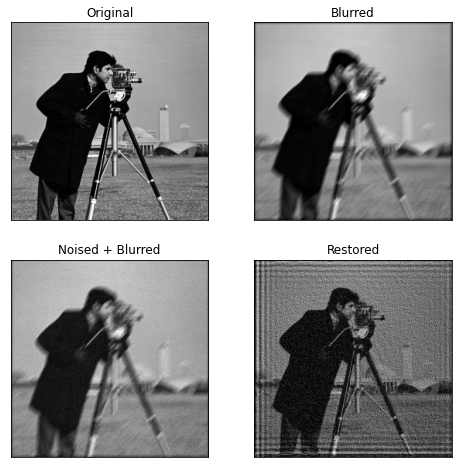

In [90]:
tif_img = cv2.imread("C:\\Work\\Image_processing\\cameraman.tif",cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(tif_img,cv2.COLOR_RGB2GRAY).astype(np.double)
height, width = gray_img.shape

PSF = np.array([[0,0,0,0,0,0,0,0.0145,0],
                [0,0,0,0,0,0,0.0262,0.0896,0.0145],
               [0,0,0,0,0,0.0262,0.0896,0.0262,0],
               [0,0,0,0,0.0262,0.0896,0.0262,0,0],
               [0,0,0,0.0262,0.0896,0.0262,0,0,0],
               [0,0,0.0262,0.0896,0.0262,0,0,0,0],
               [0,0.0262,0.0896,0.0262,0,0,0,0,0],
               [0.0145,0.0262,0.0896,0.0262,0,0,0,0,0],
               [0,0.0145,0,0,0,0,0,0,0]]
              )

blurred = convolve2d(gray_img,PSF,'same')

n_blurred = np.zeros((height,width))
std = 5
for i in range(height):
    for j in range(width):
        n_blurred[i][j] += blurred[i][j] + np.random.normal() * std

NSR = std **2 / np.var(gray_img)
restored = np.abs(wnf(motion_blurred,PSF,NSR))

rows = 2
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(8,8))

axes[0][0].imshow(gray_img,cmap='gray')
axes[0][0].set_title('Original')
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])

axes[0][1].imshow(blurred,cmap='gray')
axes[0][1].set_title('Blurred')
axes[0][1].set_xticks([])
axes[0][1].set_yticks([])

axes[1][0].imshow(n_blurred,cmap='gray')
axes[1][0].set_title('Noised + Blurred')
axes[1][0].set_xticks([])
axes[1][0].set_yticks([])

axes[1][1].imshow(restored,cmap='gray')
axes[1][1].set_title('Restored')
axes[1][1].set_xticks([])
axes[1][1].set_yticks([])

plt.show()